<b> Assignment-2 Guidelines </b>

This notebook is intended to serve as a guideline that can help you to implement all the tasks given in assignment-2. You will also find it very useful while workong on assignment-3. 

The first step in any python project is to import some standard libraries we are going to use

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
#set default figure size
mpl.rcParams['figure.figsize'] = (12, 8)

The next setp is to load the dataset that we are going to use. 
Let's insert a column of ones to be the first column in all my feature. This column represents $X_0 = 1$, which will be multiplied by $\theta_0$

In [2]:
data = pd.read_csv(r'C:\Users\betha\OneDrive\Documents\CSC 5220\Lab2_dataset.csv')
data_train = data.loc[0:11,['X', 'y']]
data_test = data.loc[0:20,['Xtest', 'ytest']]
data_val = data.loc[0:20,['Xval', 'yval']]

# Include a column of 1s in X to represent X_0 that will be multiplied by theta_0
X_train = np.c_[np.ones_like(data_train['X']), data_train['X']]
y_train = np.c_[data_train['y']]

X_val = np.c_[np.ones_like(data_val['Xval']), data_val['Xval']]
y_val = np.c_[data_val['yval']]

X_test = np.c_[np.ones_like(data_test['Xtest']), data_test['Xtest']]
y_test = np.c_[data_test['ytest']]

Let's take a look at the data

In [3]:
print('X_train:') 
print(X_train)
print('y_train:')
print(y_train)

print('X_val:')
print(X_val)
print('y_val:')
print(y_val)

print('X_test:')
print(X_test)
print('y_test:')
print(y_test)

X_train:
[[  1.     -15.9368]
 [  1.     -29.153 ]
 [  1.      36.1895]
 [  1.      37.4922]
 [  1.     -48.0588]
 [  1.      -8.9415]
 [  1.      15.3078]
 [  1.     -34.7063]
 [  1.       1.3892]
 [  1.     -44.3838]
 [  1.       7.0135]
 [  1.      22.7627]]
y_train:
[[ 2.1343]
 [ 1.1733]
 [34.3591]
 [36.838 ]
 [ 2.809 ]
 [ 2.1211]
 [14.7103]
 [ 2.6142]
 [ 3.7402]
 [ 3.7317]
 [ 7.6277]
 [22.7524]]
X_val:
[[  1.     -16.7465]
 [  1.     -14.5775]
 [  1.      34.5158]
 [  1.     -47.0101]
 [  1.      36.9751]
 [  1.     -40.6861]
 [  1.      -4.472 ]
 [  1.      26.5336]
 [  1.     -42.7977]
 [  1.      25.3741]
 [  1.     -31.1096]
 [  1.      27.3118]
 [  1.      -3.2639]
 [  1.      -1.8183]
 [  1.     -40.7197]
 [  1.     -50.0132]
 [  1.     -17.4118]
 [  1.       3.5882]
 [  1.       7.0855]
 [  1.      46.2824]
 [  1.      14.6123]]
y_val:
[[ 4.17020e+00]
 [ 4.06730e+00]
 [ 3.18731e+01]
 [ 1.06237e+01]
 [ 3.18360e+01]
 [ 4.95940e+00]
 [ 4.45160e+00]
 [ 2.22763e+01]
 [-4.39000e-

In order to plot the scatter plot of our training data, let's implement a plot function. 
The if condition in this function is intended to help us later when we try to plot the developed linear regression model on the scatter plot of the training data. Note here: once we know our model $\theta_0 + \theta_1 X_1$, we will substitute by a rane of $X$ to find our line and plot it on the data.     

In [30]:
def plotData(X, y, theta = np.array(([0],[0])), reg = 0):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[:, 1], y, s = 50, c = 'red', marker = 'x', linewidths = 1, label = 'Data')
    plt.grid(True)
    plt.title('Water Data')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    if theta.any() != 0:
        plt.plot(np.linspace(X.min(), X.max()), theta[0] + theta[1] * np.linspace(X.min(), X.max()), 
                                                 label = 'Optimized linear fit')
        plt.title('Water Data: Linear Fit')
        
    plt.legend()

Now, let's use the plot function

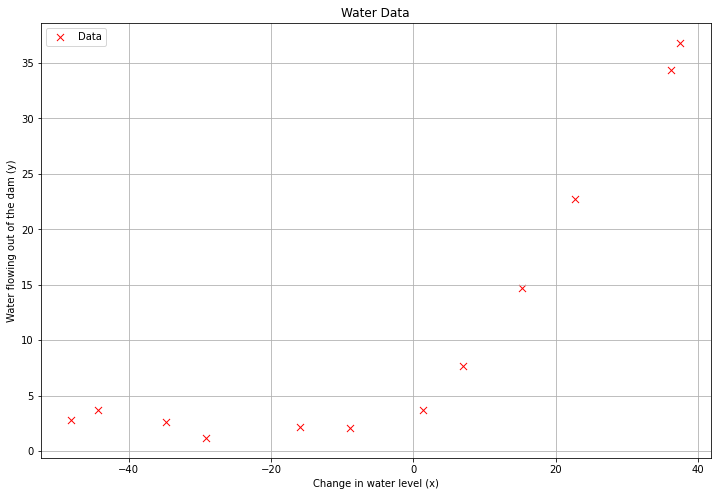

In [31]:
plotData(X_train, y_train)

Let's implement a function to calculate the cost $J$. This will be useful later in most of our next steps. This function will return the cost value. This is a general implementation that works even for regularized functions.

In [44]:
def cost(theta, X, y, reg = 0):
    m = y.size
    h = np.dot(X,theta).reshape((m, 1))
    J1 = (1 / (2 * m)) * np.sum(np.square(h - y))
    J2 = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])
    J = J1 + J2
    grad = ((1 / m)*(X.T.dot(h - y)) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel() 
    return J, grad

I noticed that most of the class sucessfuly implemented the gradient descent code to find the optimal $\theta$ values. So, what we will do here is to implement another way to find the optimal $\theta$ values using a built-in function in python. Remember: optimal $\theta$ is found by solving $\min_{\theta}J$. This is what we will implement here. You can use this same method will solving assignment-3 on Logistic regression.   

In [33]:
from scipy.optimize import minimize
def optimalTheta(theta, X, y, reg = 0):
    #Nelder-Mead yields best fit
    res = minimize(fun = cost, x0 = theta, args = (X, y, reg), method = 'Nelder-Mead', jac = True)
    return res.x

Let's use our function to find optimal $\theta$

In [34]:
initial_theta = np.ones((X_train.shape[1], 1))
opt_theta = optimalTheta(initial_theta, X_train, y_train)
print("Optimized theta: {0}".format(opt_theta))

Optimized theta: [13.0879157   0.36777795]


C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


Now, Let's plot the linear regression model on our training data

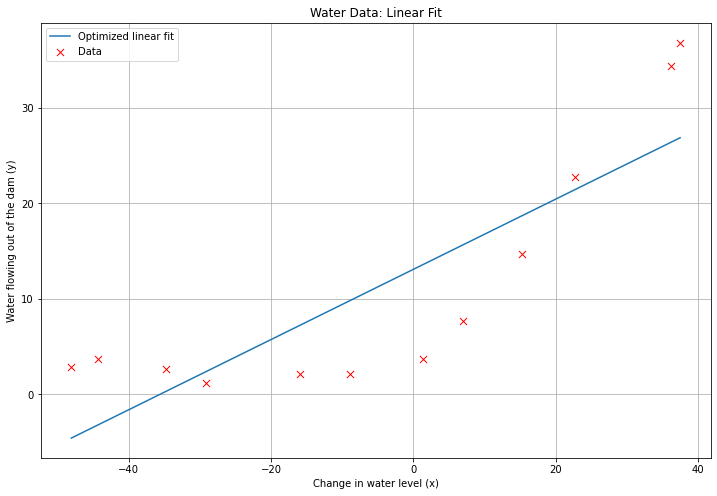

In [35]:
plotData(X_train, y_train, opt_theta)

When you later work on your own projects, you do not need to implement everything from scratch. You can directly use built-in function in Sklearn. We will do this here and compare the two results to confirm that we did a correct job in our "from scratch" implementation  

In [36]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train[:, 1].reshape(-1, 1), y_train.ravel())

LinearRegression()

Note: when you want to use this model, you should later use lr.predict and apply your test data.

Now, let's plot the two models we got (from sklearn and from our own implementation) and compare them.

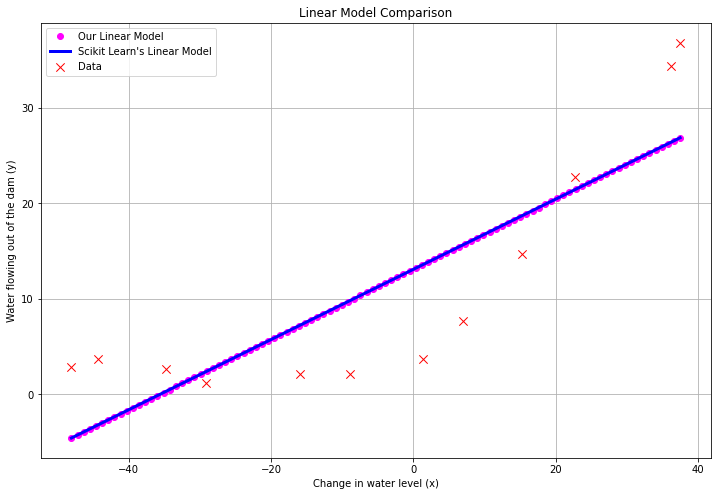

In [37]:
x_range = np.linspace(X_train.min(), X_train.max(), 100)
plt.figure(figsize = (12, 8))
plt.plot(x_range, opt_theta[0] + opt_theta[1] * x_range, 'o', c = 'magenta', label = 'Our Linear Model')
plt.plot(x_range,  lr.intercept_+ lr.coef_ * x_range, c  = 'blue', linewidth = 3,
         label = "Scikit Learn's Linear Model")
plt.scatter(X_train[:,1], y_train, s = 70, c = 'red', marker = 'x', linewidths = 1, label = "Data")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Linear Model Comparison')
plt.legend()
plt.grid(True)

Let's implement a function to plot the learning curves. We will do a for loop on the number of training examples. Each time, we will find the optimal $\theta$ values using the current set of train data, calculate the cost function (error) on train and validation data, and save the train and validation errors in arrays to plot them.  

In [38]:
def plotLearningCurve(theta, X, y, Xval, yval, reg = 0):
    m = y.size
    
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    example_num = np.arange(1, (X.shape[0] + 1))
    for i in np.arange(m):
        
        opt_theta = optimalTheta(theta, X[:i + 1], y[:i + 1], reg)
        error_train[i] = cost(opt_theta, X[:i + 1], y[:i + 1], reg)[0]
        error_val[i] = cost(opt_theta, Xval, yval, reg)[0]
    
    plt.figure(figsize = (12, 8))
    plt.plot(example_num, error_train, label = 'Training Error')
    plt.plot(example_num, error_val, label = 'Cross Validation Error')
    plt.title('Learning Curve: No Regularization')
    if reg != 0:
        plt.title('Learning Curve: Lambda = {0}'.format(reg))
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


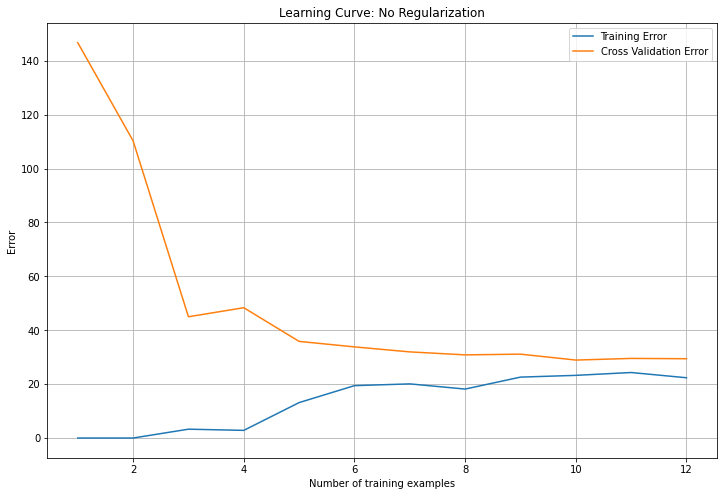

In [13]:
plotLearningCurve(initial_theta, X_train, y_train, X_val, y_val)

Now, let's implement a feature mapping and scaling function. It will take X append to it more columns to calculate more features (as a higher degree of X), then do a scaling. The scaling here is done using standardization. You can also do it using normalization. 

In [14]:
def polyFeatures(X, p):
    for i in np.arange(p):
        dim = i + 2
        X = np.insert(X, X.shape[1], np.power(X[:,1], dim), axis = 1)
    
    X_norm = X
    #column wise
    means = np.mean(X_norm, axis=0)
    X_norm[:, 1:] = X_norm[:, 1:] - means[1:]
    stds = np.std(X_norm, axis = 0)
    X_norm[:, 1:] = X_norm[:, 1:] / stds[1:]
    
    return X, X_norm

In [15]:
degree = 8

Now, let's implement a function to develop a polynomial regression model. This function will first create the higher degree features, scale them, find the optimal $\theta$, and then plot the polynomial function on the scatter training data. 

In [42]:
def plotFit(X, y, degree, num_points, reg = 0):
    X_poly = polyFeatures(X, degree)[1]
    starting_theta = np.ones((X_poly.shape[1], 1))
    opt_theta = optimalTheta(starting_theta, X_poly, y, reg)
    x_range = np.linspace(-55, 50, num_points)
    x_range_poly = np.ones((num_points, 1))
    x_range_poly = np.insert(x_range_poly, x_range_poly.shape[1], x_range.T, axis = 1)
    x_range_poly = polyFeatures(x_range_poly, len(starting_theta)-2)[0]
    y_range = x_range_poly @ opt_theta
    plotData(X, y)
    plt.plot(x_range, y_range, "--", color = "blue", label = "Polynomial regression fit")
    plt.title('Polynomial Regression Fit: No Regularization')
    if reg != 0:
        plt.title('Polynomial Regression Fit: Lambda = {0}'.format(reg))
    plt.legend()

C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


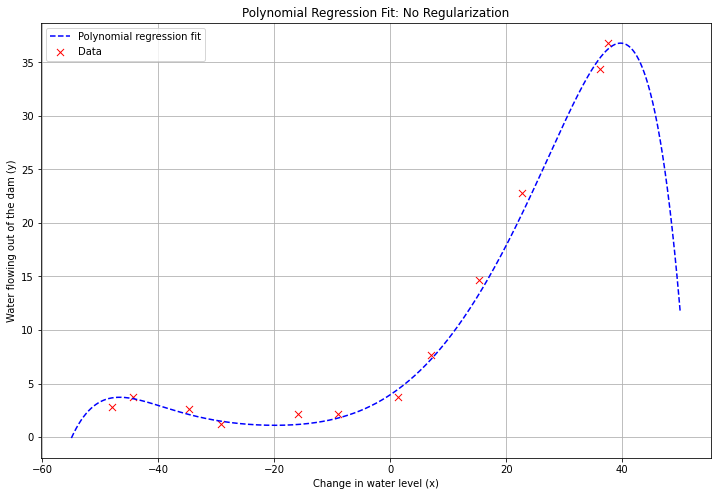

In [43]:
plotFit(X_train, y_train, degree, 1000)

Let's plot the learning curves for polynomial regression. You need first to create the higher degree features for train and validation data. Then call our learning curve function that we implemented before. You will see the training error is almost $0$ and validation error is high (with some gap from training error). This is an overfitted model.   

C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


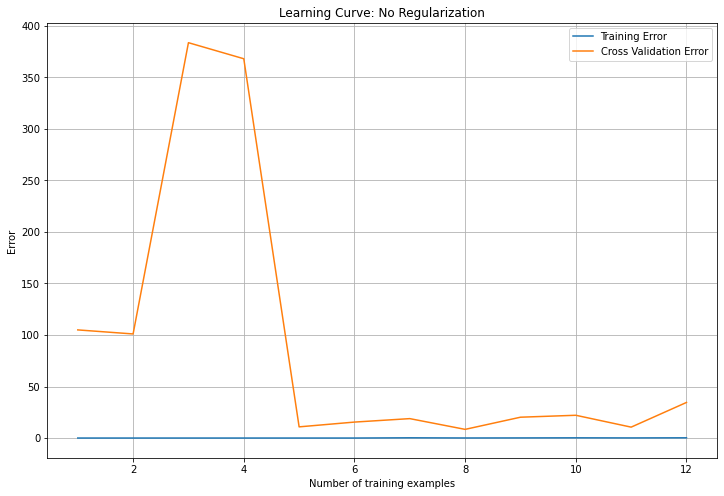

In [18]:
X_poly = polyFeatures(X_train, degree)[1]
X_poly_val = polyFeatures(X_val, degree)[1]
starting_theta = np.ones((X_poly.shape[1], 1))
plotLearningCurve(starting_theta, X_poly, y_train, X_poly_val, y_val)


Now, let's do polynomial regression when regularization parameter $\lambda \neq 0$. Here, let's make $\lambda=1$. 

C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


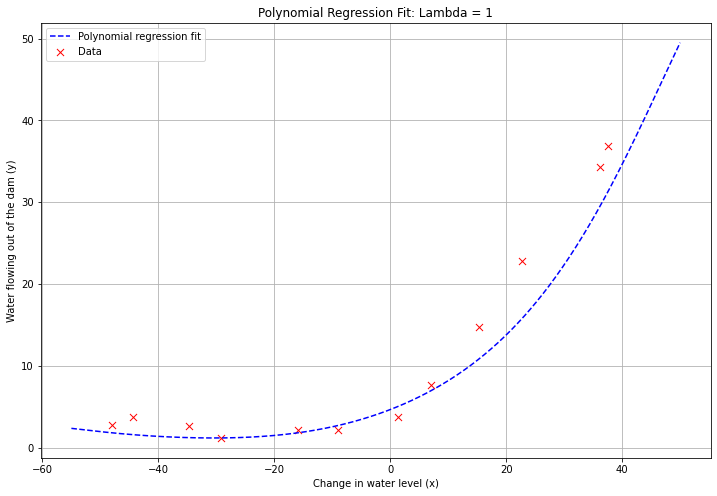

In [19]:
plotFit(X_train, y_train, degree, 1000, 1)

Let's see the learning curves in this case. You will find the trainign error increased but not so much (able to learn but also able to generalize) and the validation error reduced than before (better generalization). Hence, the model with $\lambda=1$ is better than $\lambda=0$.

C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


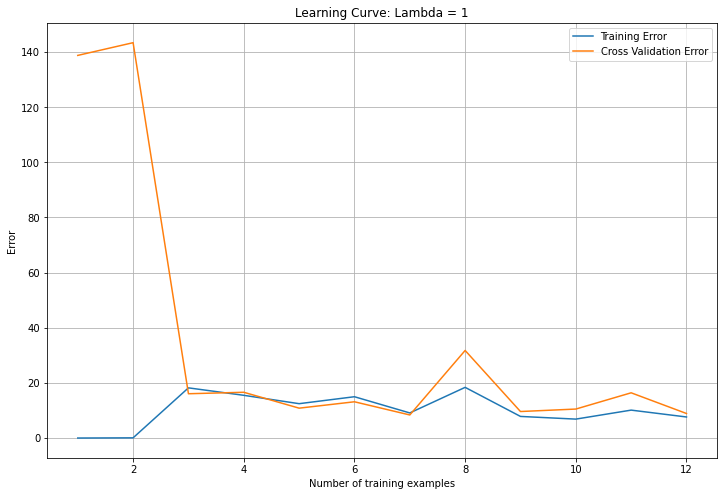

In [20]:
plotLearningCurve(starting_theta, X_poly, y_train, X_poly_val, y_val, 1)

Now, let's see what happen with high $\lambda=100$. This should be an example of underfitting. 

C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


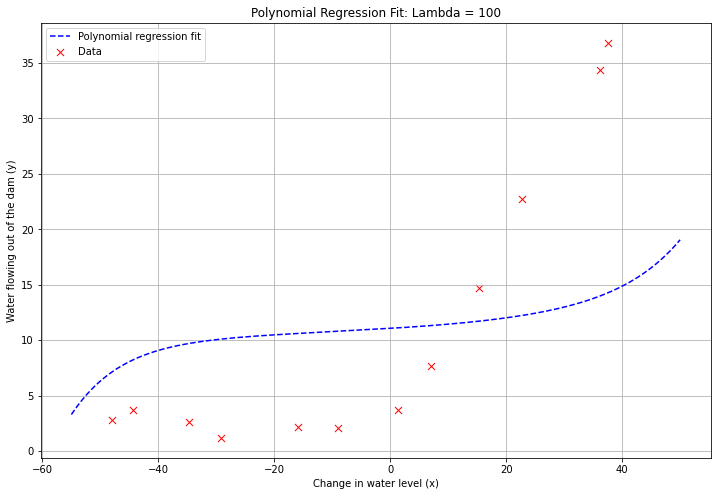

In [21]:
plotFit(X_train, y_train, degree, 1000, 100)

C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


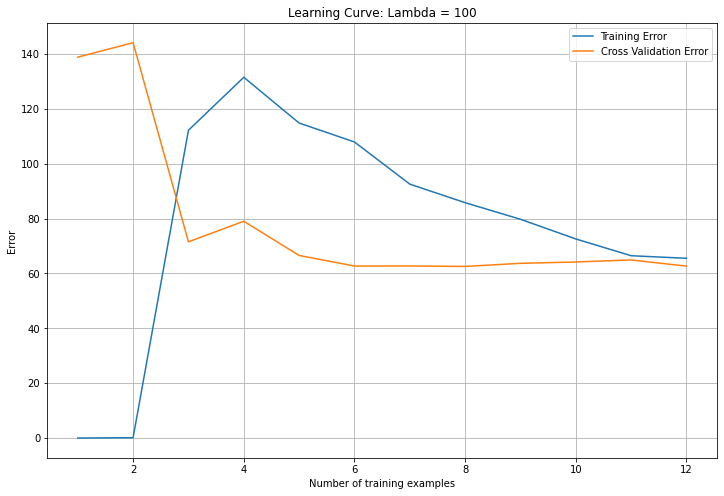

In [22]:
plotLearningCurve(starting_theta, X_poly, y_train, X_poly_val, y_val, 100)

As you can see, the model has pretty high training error (unable to learn) and also high validation error (unable to generalize). 

You can implement your own hyper-parameter optimization function that iterates over different values of $\lambda$, each time record the validation error value. Finally, select the value of $\lambda$ that gives you the least validation error. This is your optimal $\lambda$ and the corresponding model is the optimal model.   

As with linear regression, in polynomial regression there are built-in functions in sklearn that you can use to develop your optimal model, as below:

In [23]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train[:, 1].reshape(-1, 1))

In [25]:
ridge = Ridge()
ridge.fit(X_train_poly, y_train)

C:\Users\betha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17832e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge()

Again, if you want to use your fitted model, you need to use ridge.predict function.

Let's plot the result to see how the developed model fit the data

In [26]:
x_range = np.linspace(X_train.min(), X_train.max())
x_values =  poly.fit_transform(x_range.reshape(-1, 1))
y_range_lr = lr.intercept_+ np.sum(lr.coef_ * x_values, axis = 1)
y_range_ridge = ridge.intercept_ + np.sum(ridge.coef_ * x_values, axis = 1)

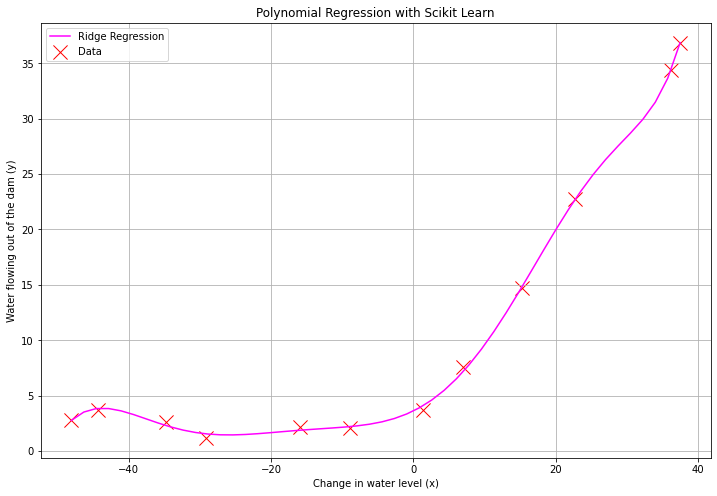

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(x_range, y_range_ridge, c  = 'magenta', label='Ridge Regression')
plt.scatter(X_train[:,1], y_train, s = 200, c = 'red', marker = 'x', linewidths = 1, label = "Data")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression with Scikit Learn')
plt.legend()
plt.grid(True)